Please find below the project details.

"The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 



Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

Steps to follow:

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (10 points)

4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
%matplotlib inline 

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [5]:
Missing_Values = ["inf","missing","?"]
c_df = pd.read_csv("cars-dataset.csv",low_memory=False,keep_default_na = True, na_values = Missing_Values)
c_df.head()
c_df.tail()

,car name,cyl,disp,hp,wt,acc,yr,mpg
393,ford mustang gl,4,140.0,86.0,2790,15.6,82,27.0
394,vw pickup,4,97.0,52.0,2130,24.6,82,44.0
395,dodge rampage,4,135.0,84.0,2295,11.6,82,32.0
396,ford ranger,4,120.0,79.0,2625,18.6,82,28.0
397,chevy s-10,4,119.0,82.0,2720,19.4,82,31.0


In [6]:
c_df2 = c_df.copy()
c_df2[~c_df2.applymap(np.isreal).all(1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190.0,3850,8.5,70,15.0


In [7]:
c_df2.dtypes
# All variables except car name are clean.

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [8]:
missing_values=c_df2.columns[c_df2.isnull().any()]
c_df2[missing_values].isnull().sum()

hp    6
dtype: int64

In [9]:
#Deleting the missing values as the count of missing records is insignificant compared to the total number of records

c_df2[c_df2["hp"].isnull()][missing_values]

,hp
32,NaN
126,NaN
330,NaN
336,NaN
354,NaN
374,NaN


In [11]:
c_df2.dropna(subset= ['hp'], inplace = True)
c_df2 = c_df2.reset_index()

In [12]:
#check for missing values if any...
missing_values=c_df2.columns[c_df2.isnull().any()]
c_df2[missing_values].isnull().sum()

Series([], dtype: float64)

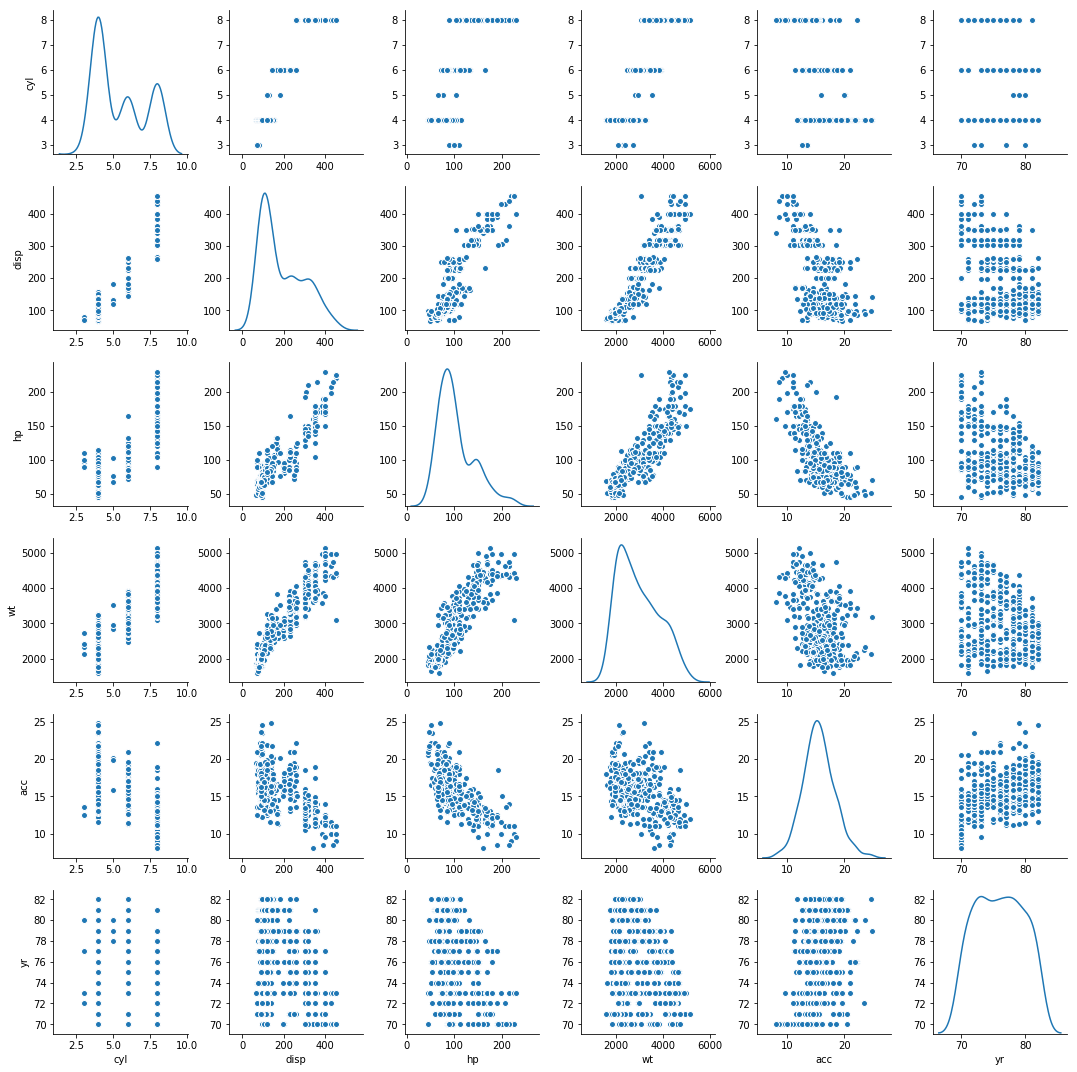

In [13]:
# Pairplot using sns

# Remove Car name and mpg from the dataset
c_df3 = c_df2.drop(["index","car name","mpg"],axis=1)

c_df3.head(10)
sns.pairplot(c_df3,diag_kind='kde')

In [ ]:
#The amount of Gaussian curves in the plot diagonal indicate visual identification of 3 different clusters

In [14]:
# Clustering dataset
# determine k using elbow method
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [15]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(c_df3)
    kmeanModel.fit(c_df3)
    distortions.append(
        sum(np.min(cdist(c_df3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / c_df3.shape[0])

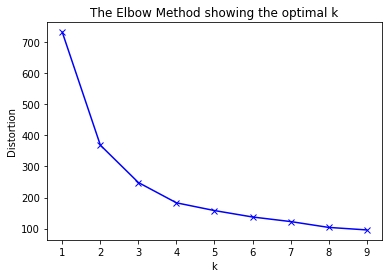

In [16]:
# Plot the elbow
import matplotlib.pyplot as plt

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
# Until the 3rd cluster, the distorting movement is vertical and beyond that it becomes more horizontal so k = 3

In [18]:
kmeans = KMeans(n_clusters=3)

In [19]:
kmeans.fit(c_df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
clusters = kmeans.labels_
clusters

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2,

In [21]:
c_df2.head(10)

,index,car name,cyl,disp,hp,wt,acc,yr,mpg
0,0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,6,chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
7,7,plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
8,8,pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
9,9,amc ambassador dpl,8,390.0,190.0,3850,8.5,70,15.0


In [22]:
c_clusters = {'xcluster':clusters}
c_clusters_df = pd.DataFrame(c_clusters)
print(c_clusters_df.count())
print(c_df2.count())
c_new_df = pd.concat([c_df2,c_clusters_df],axis=1)

xcluster    392
dtype: int64
index       392
car name    392
cyl         392
disp        392
hp          392
wt          392
acc         392
yr          392
mpg         392
dtype: int64


In [23]:
# create 3 new dataframes based on 3 clusters
grouped = c_new_df.groupby('xcluster')
l_grouped = list(grouped)

In [24]:
c_cluster1_df = l_grouped[0][1]
c_cluster2_df = l_grouped[1][1]
c_cluster3_df = l_grouped[2][1]

c_cluster1_df.reset_index(drop=True,inplace=True)
c_cluster2_df.reset_index(drop=True,inplace=True)
c_cluster3_df.reset_index(drop=True,inplace=True)

In [25]:
c_cluster1_df.drop(["index"],inplace=True,axis=1)
c_cluster2_df.drop(["index"],inplace=True,axis=1)
c_cluster3_df.drop(["index"],inplace=True,axis=1)

# Linear regression for each of the cluster dataframes.

In [27]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

In [29]:
#------------------------------------------------------------------------------
# Function defined to perform linear regression of each of the cluster dataframe and print the required stats.
#------------------------------------------------------------------------------

def LinRegres(df_in):
       
    # Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
    X = df_in.drop(["mpg","car name","xcluster"], axis=1)

    # Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
    y = df_in[['mpg']]

    #Let us break the X and y dataframes into training set and test set. For this we will use
    #Sklearn package's data splitting function which is based on random function

    from sklearn.model_selection import train_test_split
    # Split X and y into training and test set in 75:25 ratio

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Let us explore the coefficients for each of the independent attributes

    for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

        # Let us check the intercept for the model
    intercept = regression_model.intercept_[0]

    print("The intercept for our model is {}".format(intercept))

    print("Regression Model score of training data:",regression_model.score(X_train, y_train))

    print("Regression Model score of test data:",regression_model.score(X_test, y_test))
    
    return
    


In [30]:
print("\n The coeffients of Linear regression model of 1st cluster  \n")
LinRegres(c_cluster1_df)

print("\n The coeffients of Linear regression model of 2nd cluster \n")
LinRegres(c_cluster2_df)

print("\n The coeffients of Linear regression model of 3rd cluster \n")
LinRegres(c_cluster3_df)



 The coeffients of Linear regression model of 1st cluster  

The coefficient for cyl is -0.38229679464044003
The coefficient for disp is 0.005072902999324871
The coefficient for hp is -0.052142611432922294
The coefficient for wt is -0.0037843968334745196
The coefficient for acc is -0.11404278467306704
The coefficient for yr is 0.6767092077985214
The intercept for our model is -10.247994698282891
Regression Model score of training data: 0.6256487704302471
Regression Model score of test data: 0.4422143506460416

 The coeffients of Linear regression model of 2nd cluster 

The coefficient for cyl is -0.120218424358843
The coefficient for disp is 0.012871771106533987
The coefficient for hp is -0.02114654547368177
The coefficient for wt is -0.003226853189605732
The coefficient for acc is -0.00998850548565195
The coefficient for yr is 0.38514734035189463
The intercept for our model is -0.15555863716445906
Regression Model score of training data: 0.7023359630508261
Regression Model score of t